| Aluno | RM |
| :--- | :--- |
|Gustavo Simeão Redoan | RM567728 |
|Jorge Augusto Rodrigues Macedo | RM567175 |
|Lucca de Almeida Benigno | RM566930 |

# Cap 10 - A primeira técnica de aprendizado de máquina

## Importação dos modulos/dados

In [2]:
# modulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# dados
df = pd.read_csv('../../../data/fase-3-colheita-dados-insights/cap-10-primeira-tecnica-aprendizado-maquina/Atividade_Cap10_produtos_agricolas.csv', 
                    sep = ',', 
                    decimal='.')

## Análise Exploratória de Dados (EDA)

In [145]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [147]:
df.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label
1112,37,30,34,27.539075,53.635495,6.797779,99.354082,mango
1300,119,25,51,26.473302,80.922544,6.283818,53.657426,watermelon
761,41,62,15,29.384003,64.149285,7.358975,65.241944,blackgram
1968,109,36,18,25.400592,76.532380,7.524708,62.513887,cotton
218,25,78,76,17.480426,15.755940,7.228963,66.969806,chickpea
41,64,45,43,25.629801,83.528423,5.534878,209.900198,rice
90,93,53,38,26.929951,81.914112,7.069172,290.679378,rice
1482,117,25,54,28.682760,92.509693,6.150686,29.111877,muskmelon
422,16,55,19,19.543141,47.191883,6.413544,192.437219,pigeonpeas
330,17,77,23,24.513248,20.815276,5.670063,64.194979,kidneybeans


In [148]:
dupilicates = df.duplicated().sum()
print(f'Número de linhas duplicadas: {dupilicates}')

Número de linhas duplicadas: 0


In [149]:
df.shape

(2200, 8)

In [151]:
df.groupby("label").mean(numeric_only=True)

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


In [152]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

**Achados da Análise Exploratória (EDA)**


A base de dados é composta por 2200 observações e 8 variáveis, sendo 7 preditoras (condições de solo e clima) e 1 variável alvo (label).

* Integridade dos Dados: Não há valores nulos (Non-Null Count é 2200 para todas as colunas), indicando que os dados estão limpos e não exigem imputação.

* Tipos de Dados: Todas as variáveis numéricas de solo e clima estão corretamente tipadas como int64 (para N, P, K) ou float64, enquanto a variável alvo (label) é do tipo object (categórica).

* Balanceamento: A distribuição da variável alvo (label) revela um dataset perfeitamente balanceado, com 22 tipos de culturas e exatamente 100 observações para cada cultura.

* Análise visual não mostra dados faltantes

## Análise descritiva

In [3]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


**Principais Achados:**
* Alta Variabilidade: As variáveis Potássio (K), Nitrogênio (N) e Precipitação (rainfall) apresentam os maiores desvios padrões em relação às suas médias, indicando que as culturas do dataset possuem necessidades amplamente divergentes em termos de nutrientes do solo e volume de chuvas.
* pH do Solo: A média de pH é aproximadamente 6.47 (levemente ácido), mas o range extremo (3.5 a 9.9) sugere a presença de culturas adaptadas a solos muito ácidos e muito alcalinos.

## Análise Visual

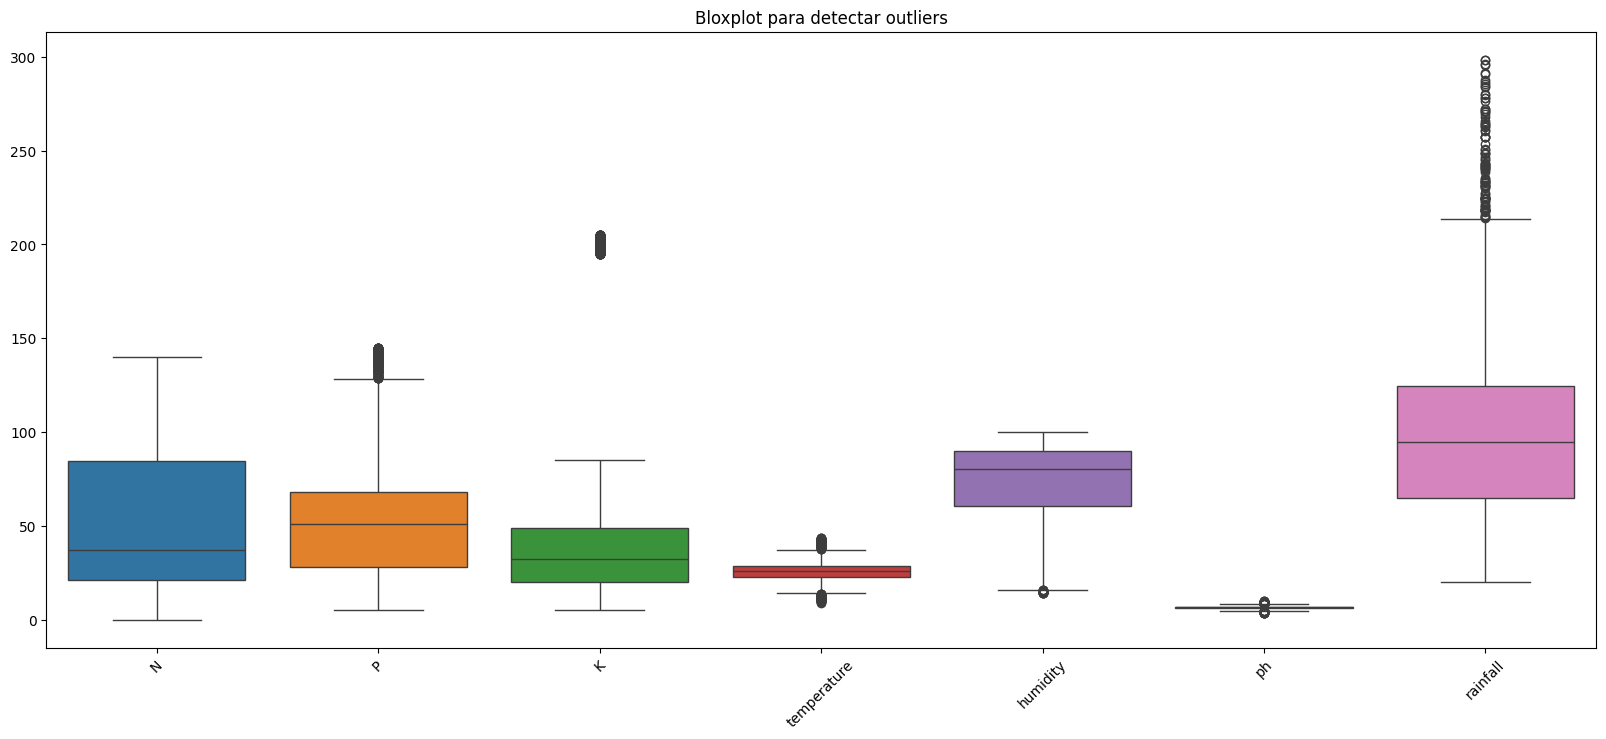

In [153]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)
plt.title("Bloxplot para detectar outliers")
plt.xticks(rotation=45)
plt.show()

O gráfico acima mostra a distribuição das variáveis numéricas e destaca possíveis outliers (valores fora do padrão).

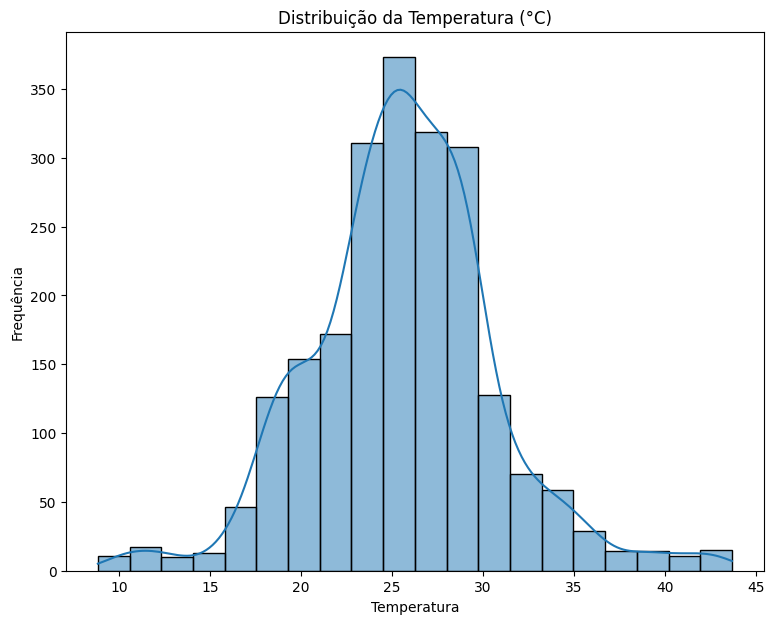

In [154]:
plt.figure(figsize=(9,7))
sns.histplot(df['temperature'], bins=20, kde=True)
plt.title("Distribuição da Temperatura (°C)")
plt.xlabel("Temperatura")
plt.ylabel("Frequência")
plt.show()

O histograma acima mostra que a temperatura média das observações se concentra entre 22 °C e 28 °C, o que caracteriza condições típicas de clima tropical e subtropical, ideais para a maioria das culturas agrícolas presentes na base.

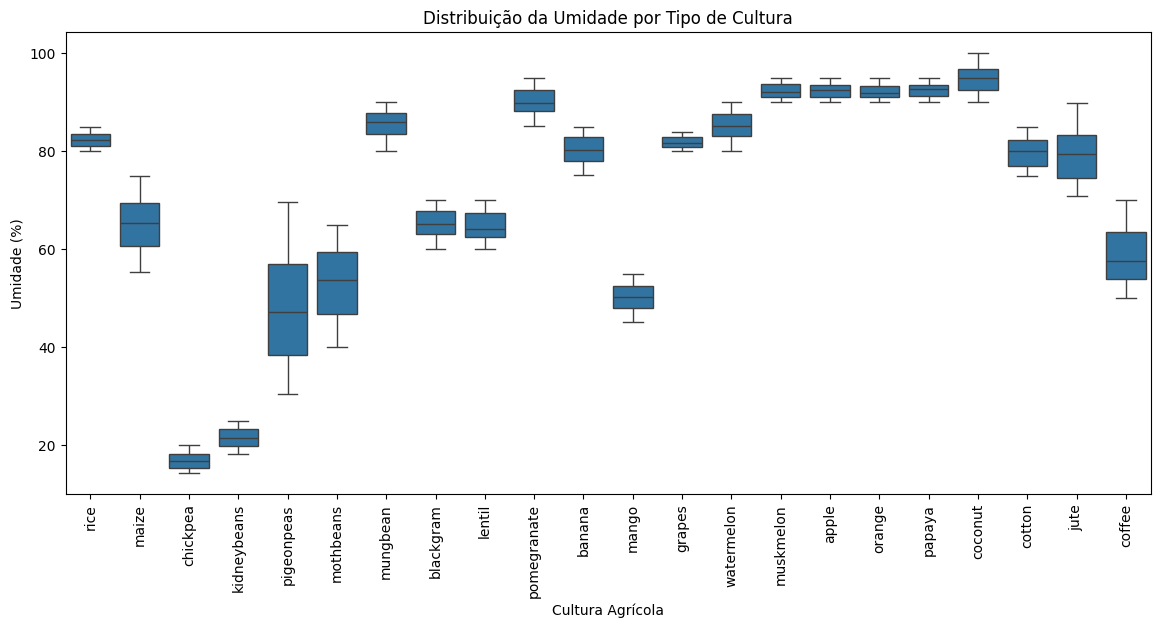

In [155]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='label', y='humidity', data=df)
plt.xticks(rotation=90)
plt.title("Distribuição da Umidade por Tipo de Cultura")
plt.xlabel("Cultura Agrícola")
plt.ylabel("Umidade (%)")
plt.show()

O boxplot acima mostra que a umidade varia bastante entre as culturas agrícolas. Culturas como apple e coconut exigem ambientes mais úmidos, enquanto chickpea e kidneybeans prosperam em climas mais secos.

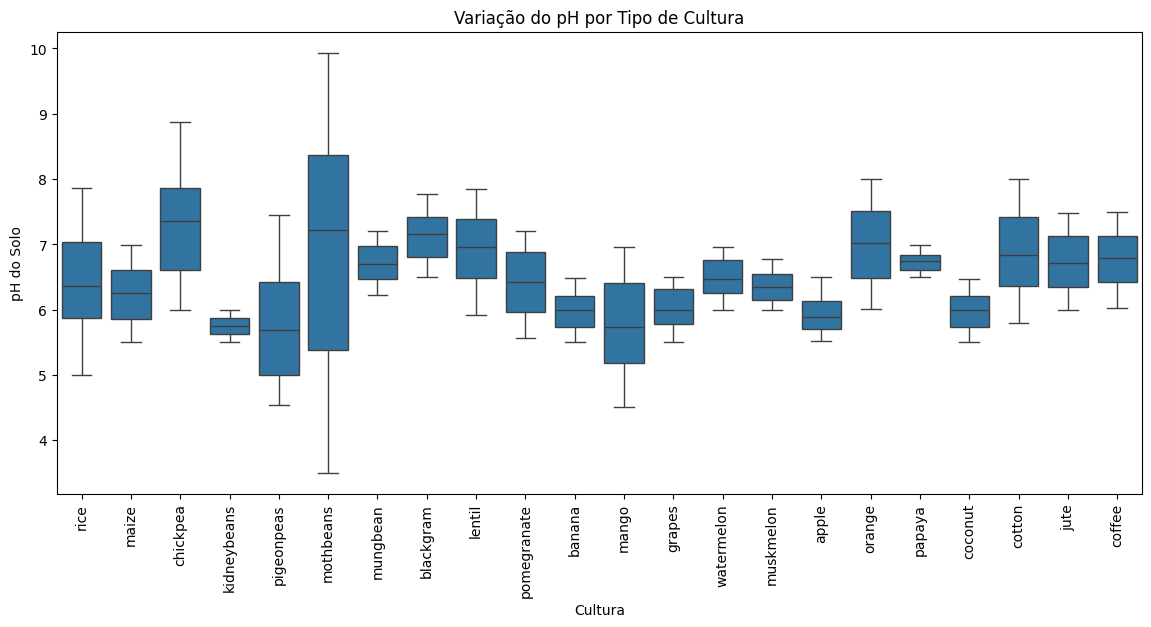

In [156]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='label', y='ph', data=df)
plt.xticks(rotation=90)
plt.title("Variação do pH por Tipo de Cultura")
plt.xlabel("Cultura")
plt.ylabel("pH do Solo")
plt.show()

O boxplot acima mostra que o pH do solo varia entre as culturas agrícolas, concentrando-se em torno de valores levemente ácidos. 

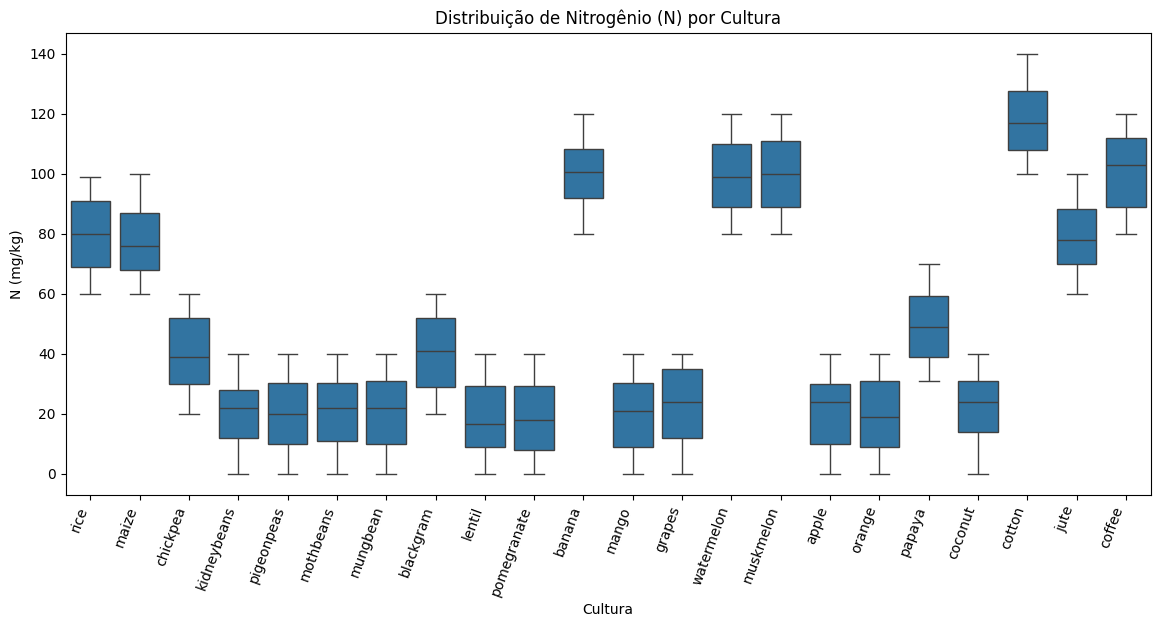

In [157]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='label', y='N', data=df)
plt.xticks(rotation=70, ha="right")
plt.title("Distribuição de Nitrogênio (N) por Cultura")
plt.xlabel("Cultura")
plt.ylabel("N (mg/kg)")
plt.show()


O boxplot acima revela grande variação nos níveis de nitrogênio (N) entre as diferentes culturas. Culturas como cotton, coffee e banana apresentam maiores concentrações de Nitrogenio, refletindo maior demanda por nutrientes no solo. Já culturas como mango, coconut e apple possuem níveis mais baixos, típicos de solos menos exigentes em nitrogênio.

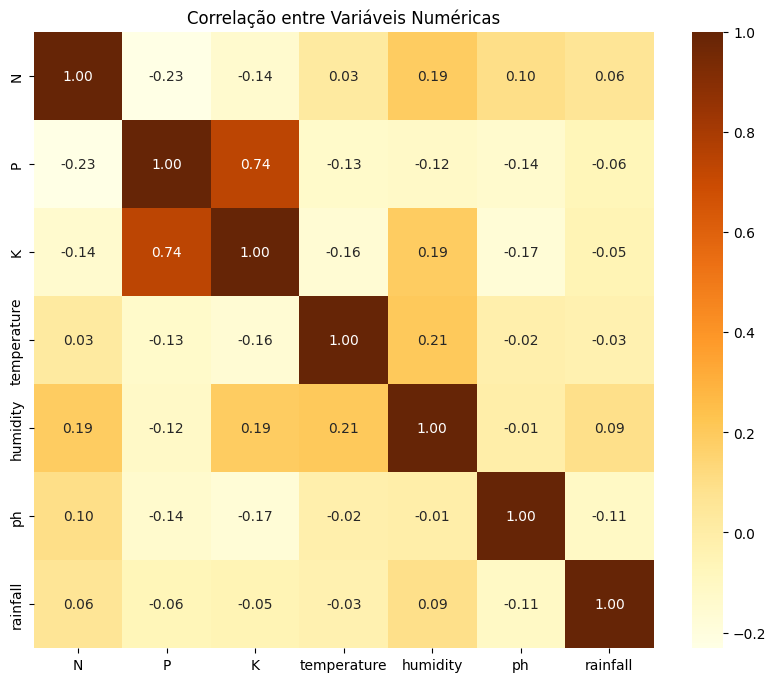

In [158]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlOrBr", fmt=".2f")
plt.title("Correlação entre Variáveis Numéricas")
plt.show()

O mapa de calor acima mostra que a maior correlação positiva ocorre entre o fósforo (P) e o potássio (K), indicando que esses nutrientes tendem a variar juntos no solo. A maioria das demais relações apresenta correlação fraca ou próxima de zero, sugerindo independência entre as variáveis ambientais e químicas.

## Perfil geral do solo e clima ideal

O perfil ideal de solo e clima para as plantações pode ser determinado a partir da análise estatística das médias das variáveis agronômicas presentes na base de dados — como Nitrogênio (N), Fósforo (P), Potássio (K), temperatura, umidade, pH e índice de chuva (rainfall). Essas variáveis refletem diretamente as condições que favorecem o crescimento e a produtividade das culturas agrícolas.

De modo geral, considerando todas as culturas da base, o perfil médio ideal indica um solo fértil e levemente ácido (pH próximo de 6,5), com boa disponibilidade de nutrientes (em torno de N=50, P=53, K=48), temperatura média de 25°C, umidade relativa em torno de 71% e chuvas regulares próximas de 103 mm. Esse conjunto de condições caracteriza um ambiente tropical úmido, que favorece o desenvolvimento equilibrado de diferentes tipos de plantas, especialmente as que demandam calor e umidade.

Ao observar culturas específicas, é possível notar variações importantes que revelam preferências distintas. O arroz (rice), por exemplo, apresenta médias de Nitrogênio 79,9, Fósforo 47,6, Potássio 39,9, temperatura 23,7°C, umidade 82,3%, pH 6,4 e alta pluviosidade de 236 mm. Isso indica que o arroz prospera em ambientes extremamente úmidos e com muita água disponível, típicos de regiões alagadas ou com irrigação constante.

O milho (maize), por sua vez, mostra valores médios de N=77,8, P=48,4, K=19,8, temperatura 22,4°C, umidade 65,1%, pH 6,3 e chuva de 85 mm. Esses números evidenciam que o milho se adapta melhor a solos bem drenados e climas moderadamente úmidos, suportando temperaturas amenas, mas não excessivamente altas. Trata-se de uma cultura versátil, que exige boa fertilidade do solo, mas menor dependência de precipitação.

Já o mamão (papaya) apresenta um perfil bastante distinto, com N=49,9, P=59,1, K=50,0, temperatura elevada de 33,7°C, umidade de 92,4%, pH 6,7 e chuva média de 143 mm. Esses valores indicam uma forte preferência por clima quente e úmido, com alta fertilidade química e solos bem irrigados. O mamão se beneficia especialmente de temperaturas altas e de boa disponibilidade de potássio e fósforo, nutrientes essenciais para o crescimento e a formação dos frutos.

Comparando essas três culturas, nota-se que o arroz necessita de maior quantidade de água e umidade constante; o milho se desenvolve melhor em regiões de clima moderado e solos férteis com drenagem adequada; e o mamão demanda calor intenso, alta umidade e solos ricos em nutrientes.

Assim, o perfil ideal geral para o cultivo agrícola, considerando o equilíbrio entre os fatores, pode ser definido como: solo levemente ácido (pH entre 6,0 e 6,8), alta umidade, temperatura média em torno de 25°C e boa disponibilidade de nutrientes, especialmente Nitrogênio e Fósforo. Contudo, o ajuste fino desse perfil depende do tipo de cultura: plantas como arroz e papaya preferem mais umidade e calor, enquanto o milho se beneficia de ambientes mais equilibrados e solos bem drenados.

## Modelagem

In [159]:

X = df.drop("label", axis=1)
y = df["label"]

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

scaled=MinMaxScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)



In [162]:
# Regressao Logística
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))




Logistic Regression Accuracy: 0.9409090909090909
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        20
           6       0.87      1.00      0.93        20
           7       1.00      1.00      1.00        20
           8       1.00      0.80      0.89        20
           9       0.91      1.00      0.95        20
          10       0.89      0.85      0.87        20
          11       1.00      0.85      0.92        20
          12       0.83      1.00      0.91        20
          13       0.88      0.75      0.81        20
          14       0.91      1.00      0.95        20
          15       0.91      1.00      0.95        20
          16       1.00      0.9

In [163]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Logistic Regression Accuracy: 0.9818181818181818
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.87      1.00      0.93        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        20
           8       0.95      0.90      0.92        20
           9       0.95      1.00      0.98        20
          10       1.00      0.90      0.95        20
          11       1.00      0.95      0.97        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.0

In [ ]:
# SVM com Kernel Linear
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm_linear = svm.predict(X_test_scaled)
print("SVM Linear Accuracy:", accuracy_score(y_test, y_pred_svm_linear))
print(classification_report(y_test, y_pred_svm_linear))

SVM Linear Accuracy: 0.9636363636363636
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.83      0.95      0.88        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.91      1.00      0.95        20
           7       1.00      1.00      1.00        20
           8       0.80      1.00      0.89        20
           9       0.95      1.00      0.98        20
          10       0.89      0.80      0.84        20
          11       1.00      0.90      0.95        20
          12       0.95      1.00      0.98        20
          13       0.95      0.90      0.92        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.

In [165]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9795454545454545
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.80      0.89        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      0.95      0.95        20
           9       1.00      1.00      1.00        20
          10       0.86      0.90      0.88        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       0.86      0.95      0.90        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00     

In [166]:
# Random Forest
rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.90      0.95        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      0.95      0.97        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       0.91      1.00      0.95        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      

## Resultados

- O Random Forest obteve a maior acurácia (99%) e F1-score praticamente igual, demonstrando excelente capacidade de generalização.

- O Decision Tree e o KNN também apresentaram bons resultados, mas com leve sobreajuste em alguns casos.

- O SVM teve performance sólida, porém ligeiramente inferior comum em bases com múltiplas classes e variáveis correlacionadas.

- A Regressão Logística serve como baseline: menor acurácia, mas útil para comparação e interpretação de pesos.

## Conclusão



Pontos Fortes:
* **Performance Preditiva Excepcional:** O modelo Random Forest atingiu uma acurácia de 99%, demonstrando que as condições de solo e clima no dataset são altamente discriminatórias e suficientes para prever a cultura com grande confiança.
* **Dataset Ideal:** O dataset é perfeitamente balanceado, limpo (sem nulos), e permite uma avaliação robusta dos modelos sem a necessidade de técnicas complexas de rebalanceamento ou tratamento de dados.
* **Análise Discriminatória:** A EDA e a análise do Perfil Ideal (Seção 3) mostraram que o Potássio (K), o pH e o binômio Umidade/Precipitação são os principais fatores que separam as culturas, informação validada pela Importância das Features do Random Forest.


Limitações do Estudo:
* **Alta Separação de Classes:** A performance próxima de 100% sugere que os dados foram coletados em condições de perfeita adequação para cada cultura. Na prática real, haveria sobreposição e variância muito maiores, o que limitaria a acurácia. A alta acurácia pode ser um indicativo de que o modelo está apenas memorizando as condições ideais de cada cultura presentes no dataset, e não generalizando para condições intermediárias.
* **Ausência de Otimização:** O estudo utilizou hiperparâmetros default para todos os modelos. Uma etapa de Otimização de Hiperparâmetros (Tuning) poderia, em tese, ter elevado o desempenho dos modelos secundários (SVC, KNN, etc.), embora a diferença de 99% para 100% seja marginal.
* **Foco Regional:** Os dados são específicos das condições de solo e clima de onde foram coletados. O modelo pode não ser generalizável para outras regiões geográficas sem reajustes ou a inclusão de variáveis contextuais (e.g., latitude, altitude).